## Seminář obecné psychologie - Inteligence

### Výzkumné cíle: 
- Srovnání výsledků skupiny studentů s dostupnými normami, resp. s výsledky získanými v rámci validizačních studií
- Odhad míry nezávislosti konstruktů měřených jednotlivými testy

### Měřené proměnné: 
- Obecná inteligence
- Emoční inteligence
- Sociální inteligence (Social Information Processing, Social Skills, Social Awareness)
- Kognitivní reflexivita (viz jeden z předchozích seminářů)
- Tendence ne/podléhat kognitivním zkreslením (viz jeden z předchozích seminářů)
- Osobnostní rysy Extraverze, Přívětivosti, Svědomitosti, Emoční stability a Otevřenost ke zkušenosti (viz jeden z předchozích seminářů)

### Metody: 
- 16 PF (Faktor B) (Cattell, 1998)
- Measure of Emotional Intelligence (Schutte et al., 1998)
- Tromsø Social Intelligence Scale (Silvera, Martinussen, & Dahl, 2001)
- CRT-L2 (Frederick, 2005; Primi et al., 2015; Toplak, West, & Stanovich, 2014)
- Sada 6 úloh inspirovaných výzkumem heuristik a zkreslení, které zjišťují některé aspekty racionálního myšlení (Toplak, West, & Stanovich, 2011)
- TIPI (Gosling, Rentfrow, & Swann, 2003)

### Data

In [146]:
# Načtěme si knihovny, které budeme potřebovat pro načtení dat a jejich přípravu na následnou analýzu a vizualizaci. 
library(tidyverse)

# Načtěme si naše data a podívejme se na jejich strukturu.
myData <- read_delim('Data_Inteligence.csv', delim = ";")
glimpse(myData)

Parsed with column specification:
cols(
  Vek = col_integer(),
  Pohlavi = col_integer(),
  Obecna_inteligence = col_integer(),
  CRT_Long = col_integer(),
  Cognitive_Biases_Sum = col_integer(),
  Emocni_inteligence = col_integer(),
  Social_information_processing = col_integer(),
  Social_skills = col_integer(),
  Social_awareness = col_integer(),
  Extraverze = col_double(),
  Privetivost = col_double(),
  Svedomitost = col_double(),
  Emocni_stabilita = col_double(),
  Otevrenost = col_double()
)


Observations: 65
Variables: 14
$ Vek                           <int> 20, 20, 21, 21, 23, 21, 19, 20, 19, 2...
$ Pohlavi                       <int> 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...
$ Obecna_inteligence            <int> 11, NA, 10, 12, NA, 12, 11, 13, 13, 1...
$ CRT_Long                      <int> 5, NA, 8, 6, NA, 5, 8, 5, NA, 3, NA, ...
$ Cognitive_Biases_Sum          <int> 2, NA, 2, 4, NA, 2, 3, 2, NA, 2, NA, ...
$ Emocni_inteligence            <int> 127, NA, 161, 101, NA, 133, 144, 121,...
$ Social_information_processing <int> 33, NA, 48, 29, NA, 45, 42, 38, 44, 3...
$ Social_skills                 <int> 33, NA, 47, 21, NA, 45, 36, 37, 26, 3...
$ Social_awareness              <int> 36, NA, 36, 22, NA, 43, 44, 46, 38, 4...
$ Extraverze                    <dbl> 4.0, 5.5, 6.0, NA, NA, 6.0, 4.5, NA, ...
$ Privetivost                   <dbl> 5.5, 4.5, 5.5, NA, NA, 5.0, 4.5, NA, ...
$ Svedomitost                   <dbl> 6.5, 3.5, 6.5, NA, NA, 7.0, 5.5, NA, ...
$ Emocni_stabilita   

In [147]:
# Upravme proměnnou 'Pohlaví' na kategoriální proměnnou se smyslupným označením jejích jednotlivých úrovní  
myData$Pohlavi <- as.factor(ifelse(myData$Pohlavi == 1, "M", "F"))

# Přeškálujme výsledky 'Cognitive_Biases_Sum' tak, aby vyšší skór odpovídal větší schopnosti nepodléhat kognitivním zkreslením
myData$Cognitive_Biases_Sum <- (6 - myData$Cognitive_Biases_Sum)

### Popis výzkumného souboru

In [148]:
# Z hlediska věku probandů
library(Hmisc)
myData %>%
select(Vek) %>%
Hmisc::describe()

. 

 1  Variables      65  Observations
--------------------------------------------------------------------------------
Vek 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
      65        0       10     0.94    21.06     2.42     19.0     19.0 
     .25      .50      .75      .90      .95 
    20.0     20.0     21.0     22.6     24.8 
                                                                      
Value         19    20    21    22    23    24    25    26    29    43
Frequency     15    22    12     9     1     2     1     1     1     1
Proportion 0.231 0.338 0.185 0.138 0.015 0.031 0.015 0.015 0.015 0.015
--------------------------------------------------------------------------------

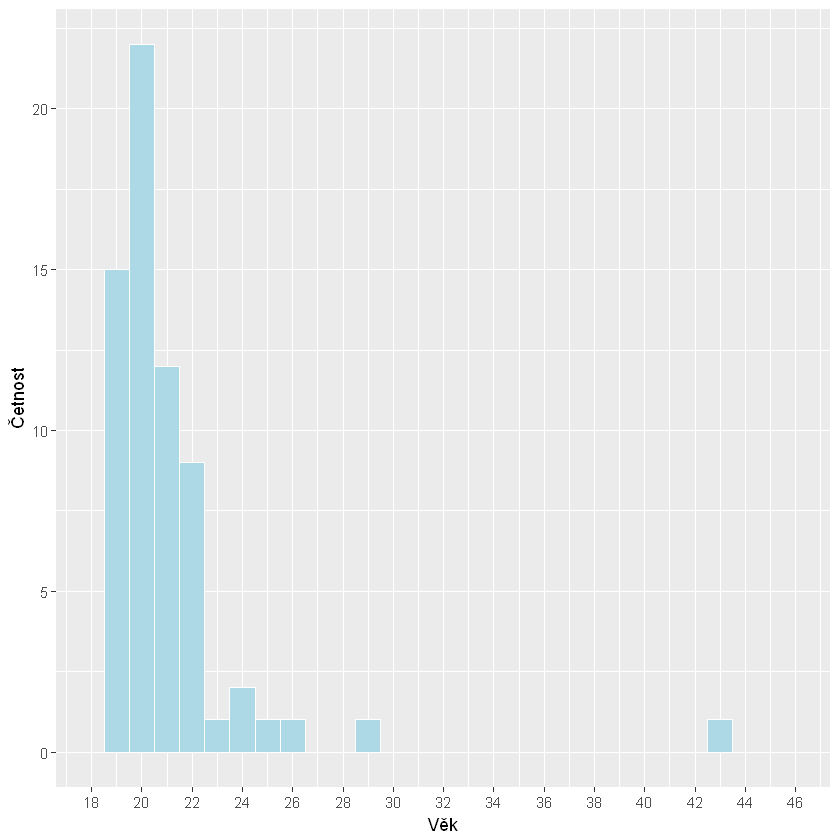

In [149]:
myData %>%
select(Vek) %>%
ggplot(aes(Vek))+
geom_histogram(colour="white", fill="lightblue", binwidth = 1)+
scale_x_continuous(breaks = seq(18, 46, 2), limits = c(18, 46))+
xlab("Věk")+
ylab("Četnost")

In [150]:
# Z hlediska pohlaví probandů
table(myData$Pohlavi)
round(prop.table(table(myData$Pohlavi)),2)


 F  M 
55 10 


   F    M 
0.85 0.15 

### Popisná statistika sledovaných proměnných

In [151]:
# Celkový přehled
library(psych)
myData %>%
select(-Vek, -Pohlavi) %>%
psych::describe()

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Obecna_inteligence,1,46,11.565217,1.5585203,12.0,11.552632,1.48260,9.0,15.0,6.0,0.070929719,-0.78236706,0.2297913
CRT_Long,2,37,5.918919,2.0999785,6.0,6.032258,2.96520,1.0,9.0,8.0,-0.333766051,-0.65458327,0.3452343
Cognitive_Biases_Sum,3,37,4.081081,1.0375821,4.0,4.064516,1.48260,2.0,6.0,4.0,-0.010816303,-0.72373223,0.1705774
Emocni_inteligence,4,47,126.744681,12.1984819,125.0,126.641026,8.89560,99.0,161.0,62.0,0.297770704,0.35777018,1.7793315
Social_information_processing,5,47,39.489362,4.6197701,39.0,39.641026,4.44780,29.0,49.0,20.0,-0.373280330,0.01462936,0.6738627
Social_skills,6,47,33.127660,7.9799123,33.0,33.256410,10.37820,16.0,47.0,31.0,-0.170828653,-1.02684616,1.1639898
Social_awareness,7,45,38.755556,5.8002961,39.0,39.351351,5.93040,22.0,48.0,26.0,-0.897669515,0.53583624,0.8646571
Extraverze,8,42,4.142857,1.3264923,4.0,4.147059,1.48260,1.0,6.5,5.5,-0.064171692,-0.76031006,0.2046822
Privetivost,9,42,5.297619,0.7813335,5.0,5.264706,0.74130,3.5,7.0,3.5,0.145744518,-0.80681918,0.1205624
Svedomitost,10,42,5.369048,1.2200536,5.5,5.470588,1.48260,1.5,7.0,5.5,-0.951216912,0.88877406,0.1882584


#### Obecná inteligence

Warning message:
"Removed 19 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 19 rows containing non-finite values (stat_summary)."Warning message:
"Removed 19 rows containing missing values (geom_point)."Warning message:
"Removed 19 rows containing non-finite values (stat_bin)."

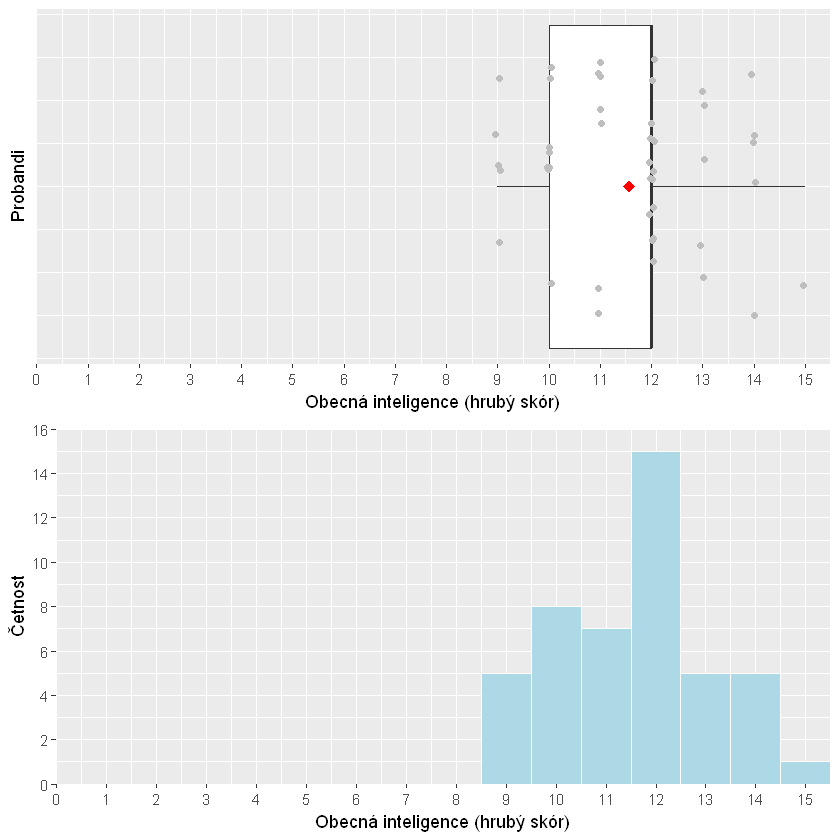

In [152]:
library(gridExtra)

graf_IQ1 <- ggplot(myData, aes(Obecna_inteligence))+
      geom_histogram(colour="white", fill="lightblue", binwidth = 1)+
      scale_x_continuous(expand = c(0,0), limit = c(0, 15.5), breaks = seq(0,15,1))+
      scale_y_continuous(expand = c(0,0), limit = c(0, 16), breaks = seq(0,16,2))+
      xlab("Obecná inteligence (hrubý skór)")+
      ylab("Četnost")
                        
graf_IQ2 <- ggplot(myData, aes(x=1, y= Obecna_inteligence))+
      geom_boxplot(outlier.shape = NA)+
      geom_jitter(color = "grey", width = 0.3, height = 0.05)+
      stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
      coord_flip()+
      scale_y_continuous(expand = c(0,0), limit = c(0, 15.5), breaks = seq(0,15,1))+
      theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
      xlab("Probandi")+
      ylab("Obecná inteligence (hrubý skór)")
    
grid.arrange(graf_IQ2, graf_IQ1, ncol=1)

#### Emoční inteligence

Warning message:
"Removed 18 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 18 rows containing non-finite values (stat_summary)."Warning message:
"Removed 18 rows containing missing values (geom_point)."Warning message:
"Removed 18 rows containing non-finite values (stat_bin)."

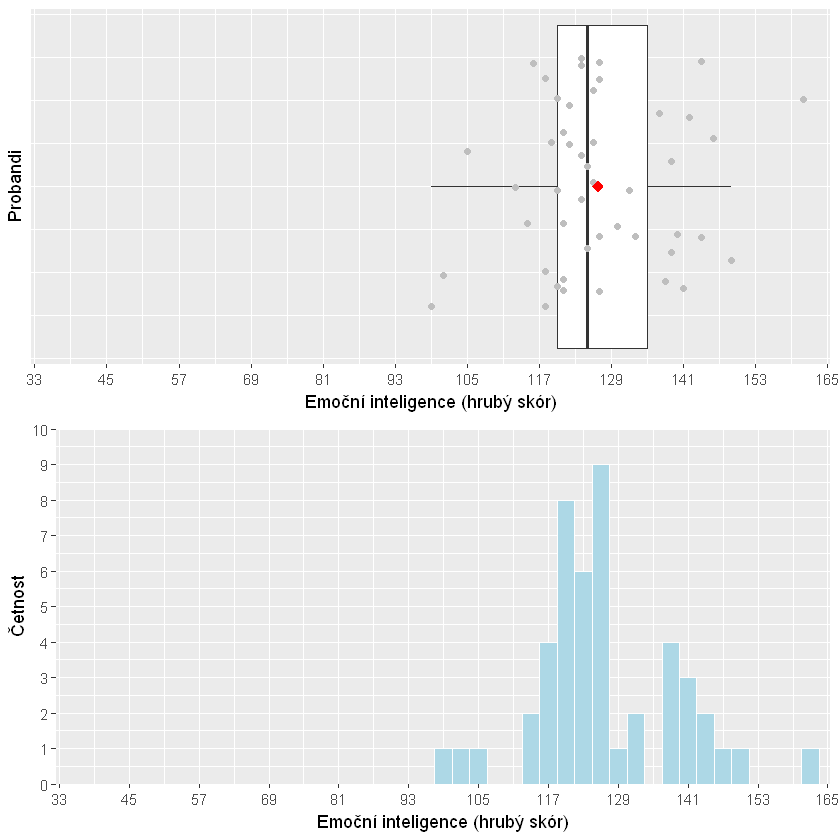

In [153]:
graf_EQ1 <- ggplot(myData, aes(Emocni_inteligence))+
      geom_histogram(colour="white", fill="lightblue", binwidth = 3)+
      scale_x_continuous(expand = c(0,0), breaks = seq(33, 165, 12), limits = c(32.5, 165.5))+
      scale_y_continuous(expand = c(0,0), limit = c(0, 10), breaks = seq(0,10,1))+
      xlab("Emoční inteligence (hrubý skór)")+
      ylab("Četnost")
                        
graf_EQ2 <- ggplot(myData, aes(x=1, y= Emocni_inteligence))+
      geom_boxplot(outlier.shape = NA)+
      geom_jitter(color = "grey", width = 0.3, height = 0.05)+
      stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
      coord_flip()+
      scale_y_continuous(expand = c(0,0), breaks = seq(33, 165, 12), limits = c(32.5, 165.5))+
      theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
      xlab("Probandi")+
      ylab("Emoční inteligence (hrubý skór)")
    
grid.arrange(graf_EQ2, graf_EQ1, ncol=1)

#### Sociální inteligence

Warning message:
"Removed 56 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 56 rows containing non-finite values (stat_summary)."Warning message:
"Removed 56 rows containing missing values (geom_point)."

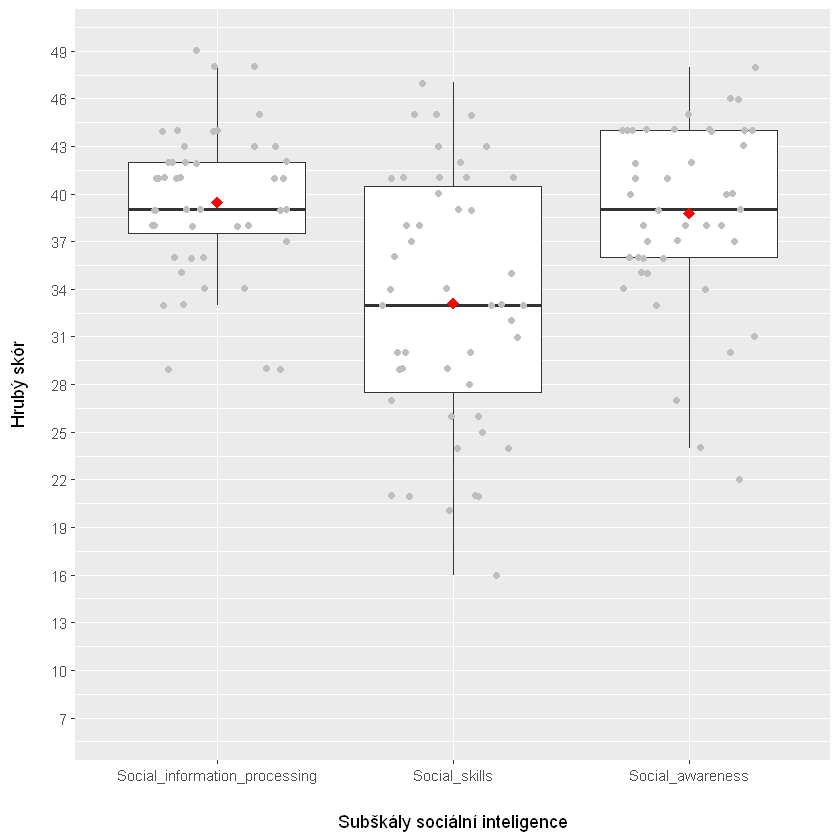

In [154]:
# Upravme si formát dat z "širokého" na "dlouhý"
myData2 <- myData %>%
select(Social_information_processing, Social_skills, Social_awareness) %>%
gather(Type_Of_Intelligence, Score, Social_information_processing:Social_awareness, factor_key = T)

ggplot(myData2, aes(Type_Of_Intelligence, Score))+
  geom_boxplot(outlier.shape = NA)+
  geom_jitter(color = "grey", width = 0.3, height = 0.05)+
  stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
  ylab("Hrubý skór")+
  xlab("Subškály sociální inteligence")+
  theme(axis.title.x=element_text(margin=margin(20,0,0,0)),
       axis.title.y=element_text(margin=margin(0,15,0,0)))+
  scale_y_continuous(breaks = seq(7, 49, 3), limits = c(6.5, 49.5))

#### Kognitivní reflexivita

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 28 rows containing non-finite values (stat_summary)."Warning message:
"Removed 28 rows containing missing values (geom_point)."Warning message:
"Removed 28 rows containing non-finite values (stat_bin)."

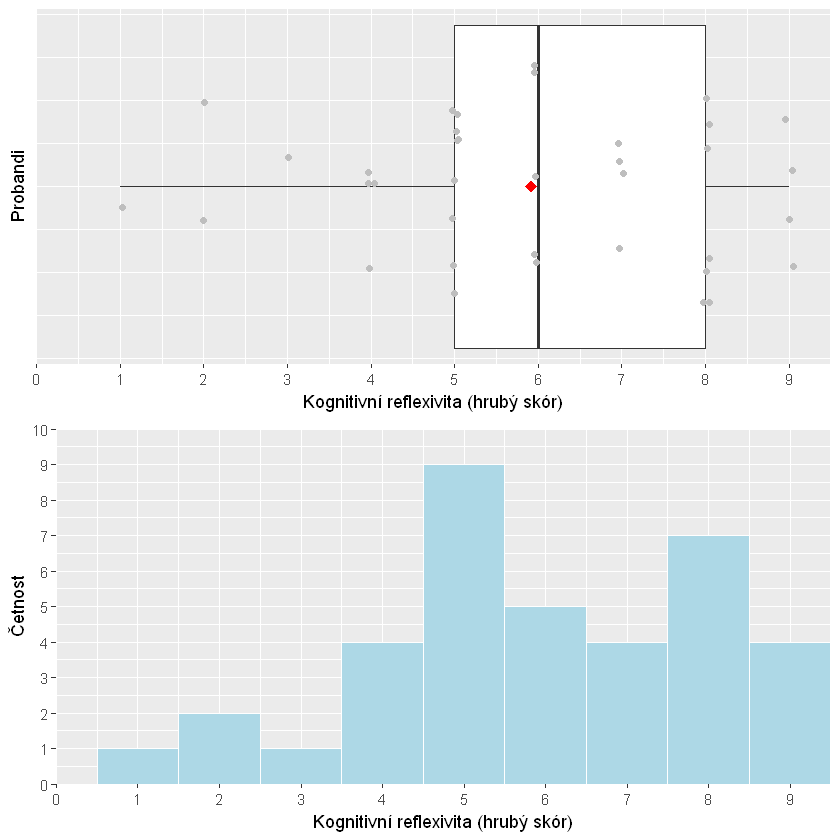

In [155]:
graf_CRT1 <- ggplot(myData, aes(CRT_Long))+
      geom_histogram(colour="white", fill="lightblue", binwidth = 1)+
      scale_x_continuous(expand = c(0,0), limit = c(0, 9.5), breaks = seq(0,9,1))+
      scale_y_continuous(expand = c(0,0), limit = c(0, 10), breaks = seq(0,10,1))+
      xlab("Kognitivní reflexivita (hrubý skór)")+
      ylab("Četnost")
                        
graf_CRT2 <- ggplot(myData, aes(x=1, y= CRT_Long))+
      geom_boxplot(outlier.shape = NA)+
      geom_jitter(color = "grey", width = 0.3, height = 0.05)+
      stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
      coord_flip()+
      scale_y_continuous(expand = c(0,0), limit = c(0, 9.5), breaks = seq(0,9,1))+
      theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
      xlab("Probandi")+
      ylab("Kognitivní reflexivita (hrubý skór)")
    
grid.arrange(graf_CRT2, graf_CRT1, ncol=1)

#### Tendence nepodléhat kognitivním zkreslením

Warning message:
"Removed 28 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 28 rows containing non-finite values (stat_summary)."Warning message:
"Removed 28 rows containing missing values (geom_point)."Warning message:
"Removed 28 rows containing non-finite values (stat_bin)."

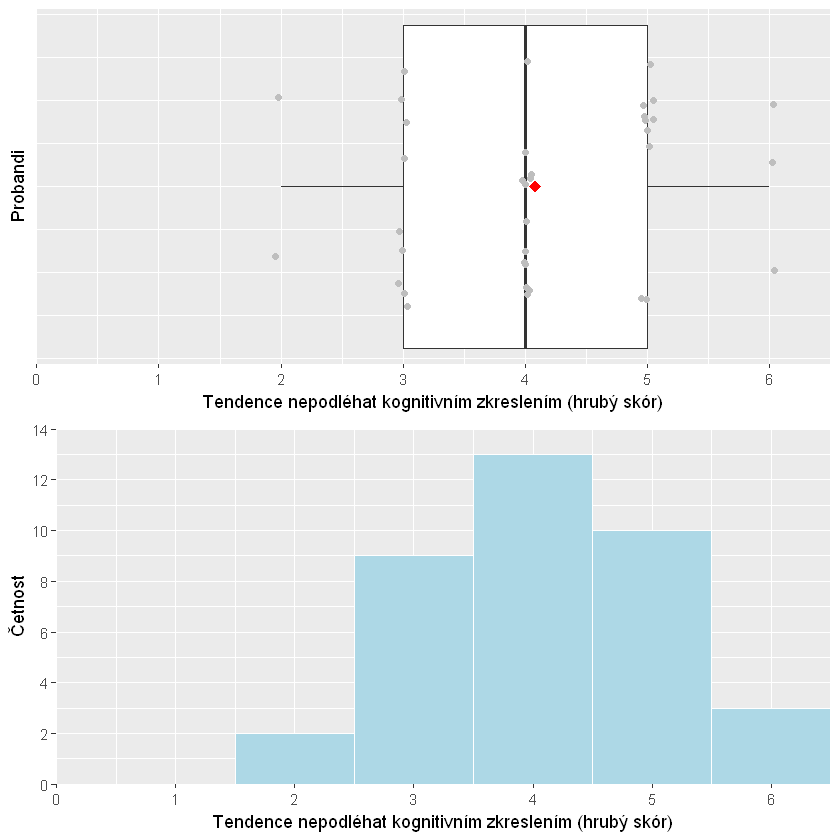

In [159]:
graf_CB1 <- ggplot(myData, aes(Cognitive_Biases_Sum))+
      geom_histogram(colour="white", fill="lightblue", binwidth = 1)+
      scale_x_continuous(expand = c(0,0), limit = c(0, 6.5), breaks = seq(0,6,1))+
      scale_y_continuous(expand = c(0,0), limit = c(0, 14), breaks = seq(0,14,2))+
      xlab("Tendence nepodléhat kognitivním zkreslením (hrubý skór)")+
      ylab("Četnost")
                        
graf_CB2 <- ggplot(myData, aes(x=1, y= Cognitive_Biases_Sum))+
      geom_boxplot(outlier.shape = NA)+
      geom_jitter(color = "grey", width = 0.3, height = 0.05)+
      stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
      coord_flip()+
      scale_y_continuous(expand = c(0,0), limit = c(0, 6.5), breaks = seq(0,6,1))+
      theme(axis.text.y=element_blank(),
        axis.ticks.y=element_blank())+
      xlab("Probandi")+
      ylab("Tendence nepodléhat kognitivním zkreslením (hrubý skór)")
    
grid.arrange(graf_CB2, graf_CB1, ncol=1)

#### Osobnostní charakteristiky (Big Five)

Warning message:
"Removed 115 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 115 rows containing non-finite values (stat_summary)."Warning message:
"Removed 115 rows containing missing values (geom_point)."

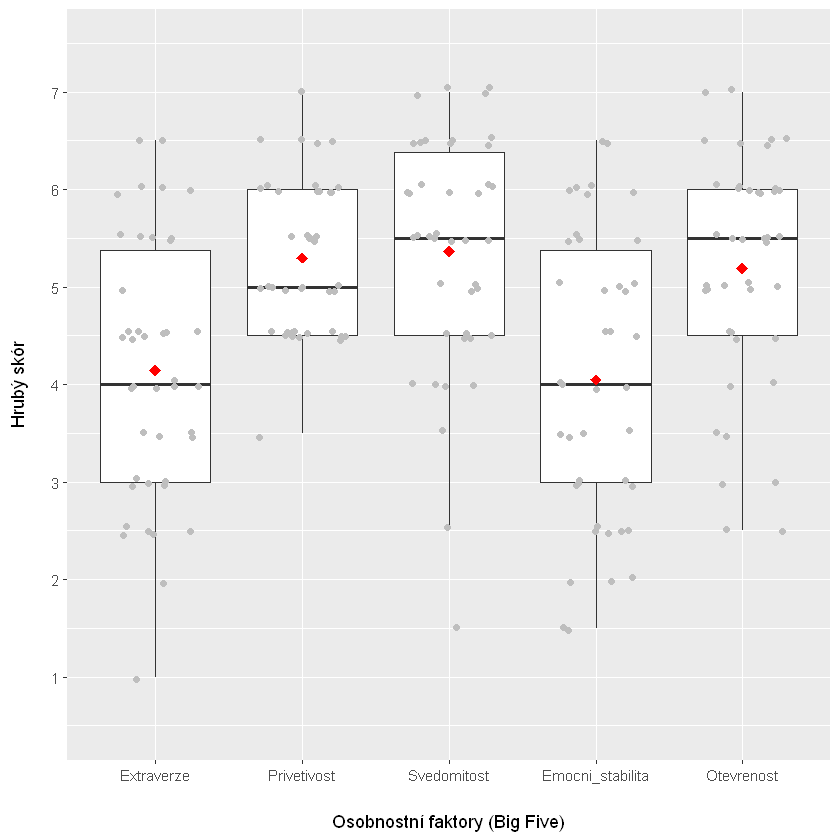

In [157]:
# Upravme si formát dat z "širokého" na "dlouhý"
myData3 <- myData %>%
select(Extraverze, Privetivost, Svedomitost, Emocni_stabilita, Otevrenost) %>%
gather(Osobnostni_faktor, Skor, Extraverze:Otevrenost, factor_key = T)

ggplot(myData3, aes(Osobnostni_faktor, Skor))+
  geom_boxplot(outlier.shape = NA)+
  geom_jitter(color = "grey", width = 0.3, height = 0.05)+
  stat_summary(fun.y=mean, colour="red", geom="point", shape=18, size=3)+
  ylab("Hrubý skór")+
  xlab("Osobnostní faktory (Big Five)")+
  theme(axis.title.x=element_text(margin=margin(20,0,0,0)),
       axis.title.y=element_text(margin=margin(0,15,0,0)))+
  scale_y_continuous(breaks = seq(1, 7, 1), limits = c(0.5, 7.5))

### Inferenční statistika

,Obecna_inteligence,CRT_Long,Cognitive_Biases_Sum,Emocni_inteligence,Social_information_processing,Social_skills,Social_awareness,Extraverze,Privetivost,Svedomitost,Emocni_stabilita,Otevrenost
Obecna_inteligence,1.00,0.36,0.25,-0.27,0.08,-0.28,-0.06,0.19,0.02,-0.40,-0.27,-0.25
CRT_Long,0.36,1.00,0.37,0.07,-0.09,-0.15,-0.21,-0.09,0.05,-0.14,-0.20,0.17
Cognitive_Biases_Sum,0.25,0.37,1.00,0.09,-0.06,0.02,-0.02,0.03,0.16,-0.16,0.19,-0.37
Emocni_inteligence,-0.27,0.07,0.09,1.00,0.53,0.52,0.34,0.43,0.02,0.54,0.18,0.45
Social_information_processing,0.08,-0.09,-0.06,0.53,1.00,0.40,0.63,0.38,-0.24,0.29,-0.13,0.33
Social_skills,-0.28,-0.15,0.02,0.52,0.40,1.00,0.40,0.56,-0.33,0.12,0.22,0.35
Social_awareness,-0.06,-0.21,-0.02,0.34,0.63,0.40,1.00,-0.01,-0.06,0.34,0.02,0.37
Extraverze,0.19,-0.09,0.03,0.43,0.38,0.56,-0.01,1.00,-0.11,-0.08,-0.01,0.19
Privetivost,0.02,0.05,0.16,0.02,-0.24,-0.33,-0.06,-0.11,1.00,0.18,0.01,-0.12
Svedomitost,-0.40,-0.14,-0.16,0.54,0.29,0.12,0.34,-0.08,0.18,1.00,0.14,-0.08


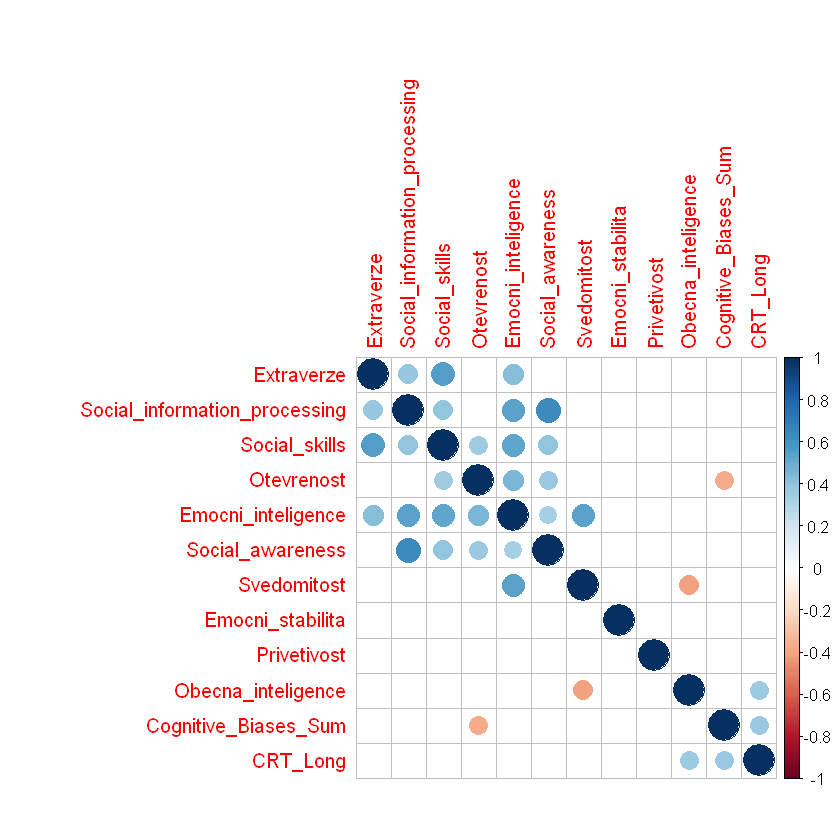

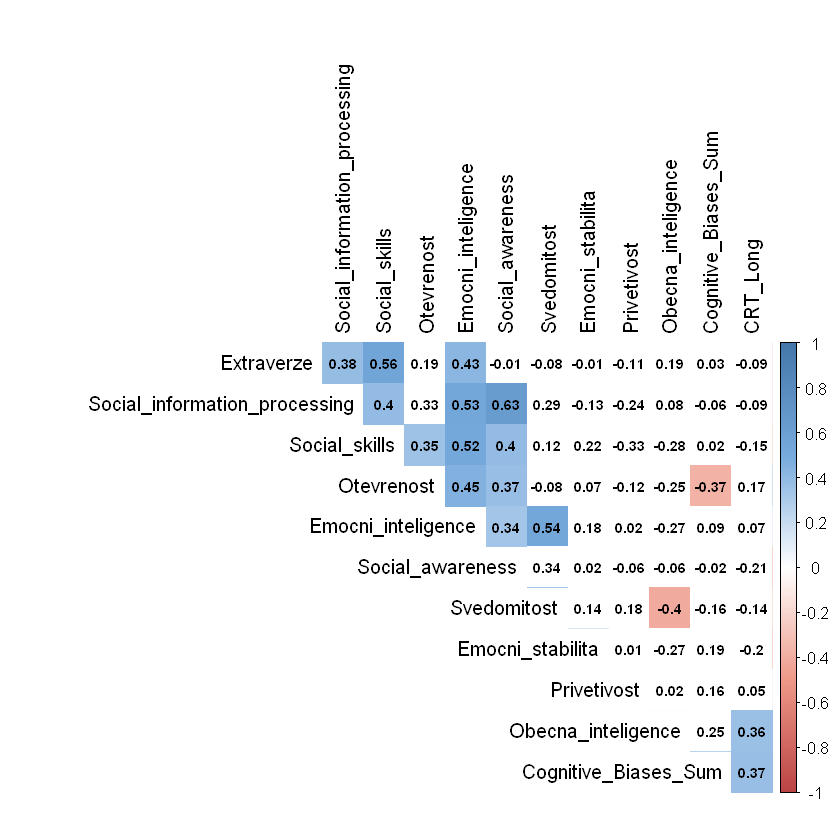

In [173]:
library(corrplot)

M <- myData %>%
select(-Vek, -Pohlavi) %>%
cor(use="pairwise.complete.obs", method="pearson")

res <- myData %>%
select(-Vek, -Pohlavi) %>%
cor.mtest(conf.level = .95)

corrplot(M, method = "circle",order = "AOE", p.mat = res$p, insig = "blank") # AOE, hclust, FPC

round(M,2)

col <- colorRampPalette(c("#BB4444", "#EE9988", "#FFFFFF", "#77AADD", "#4477AA"))
corrplot(M, method = "color", col = col(200),
         type = "upper", order = "AOE", number.cex = .7,
         addCoef.col = "black", # Add coefficient of correlation
         tl.col = "black", tl.srt = 90, # Text label color and rotation
         # Combine with significance
         p.mat = res$p, sig.level = 0.05, insig = "blank", 
         # hide correlation coefficient on the principal diagonal
         diag = FALSE)